##TASK 6
##Predcition using Decision Tree algorithm
*  Create the Decision Tree classifier and visualize it graphically
*  The puprose is we feed any new data to this classifier, it would be albe to predict the right class accordingly
*  dataset used : iris


In [68]:
#importing the necessary modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
#loading the dataset
iris = pd.read_csv("Iris.csv",index_col='Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [71]:
iris.shape

(150, 5)

In [72]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [73]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
#find the correlation
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


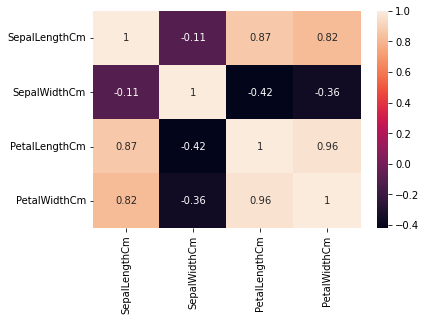

In [75]:
#heat map for correlation
sns.heatmap(data = iris.corr(), annot = True)

In [76]:
#assigning target variable 
x = iris.drop(labels= 'Species', axis= 1)

y = iris['Species']

In [77]:
#splitting data into training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [78]:
#creation of decision tree classifier object
classifier = DecisionTreeClassifier(criterion='entropy')

#training the model
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [89]:
#evaluating the model
from sklearn.metrics import accuracy_score
print("Accuracy score : ",accuracy_score(y_pred,y_test))
confusion_matrix(y_test, y_pred)

Accuracy score :  0.9333333333333333


array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  0, 10]])

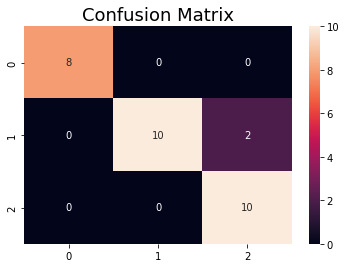


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [91]:
# Confusion Matix
sns.heatmap(data = confusion_matrix(y_test, y_pred), annot= True)
plt.title('Confusion Matrix', fontsize= 18)
plt.show()

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

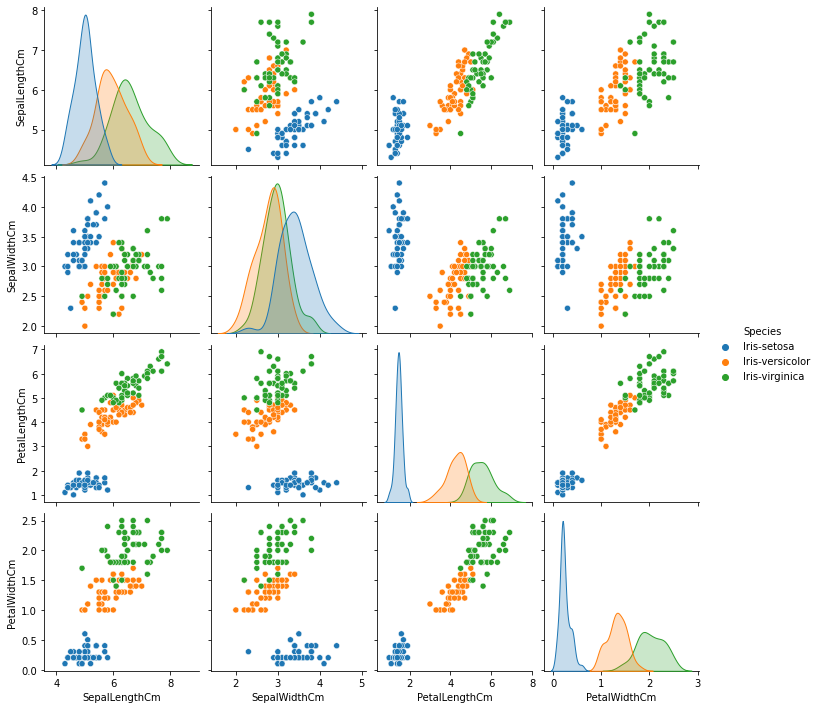

In [80]:
#pair plot
sns.pairplot(data= iris, hue= 'Species')  

In [81]:
from sklearn import tree

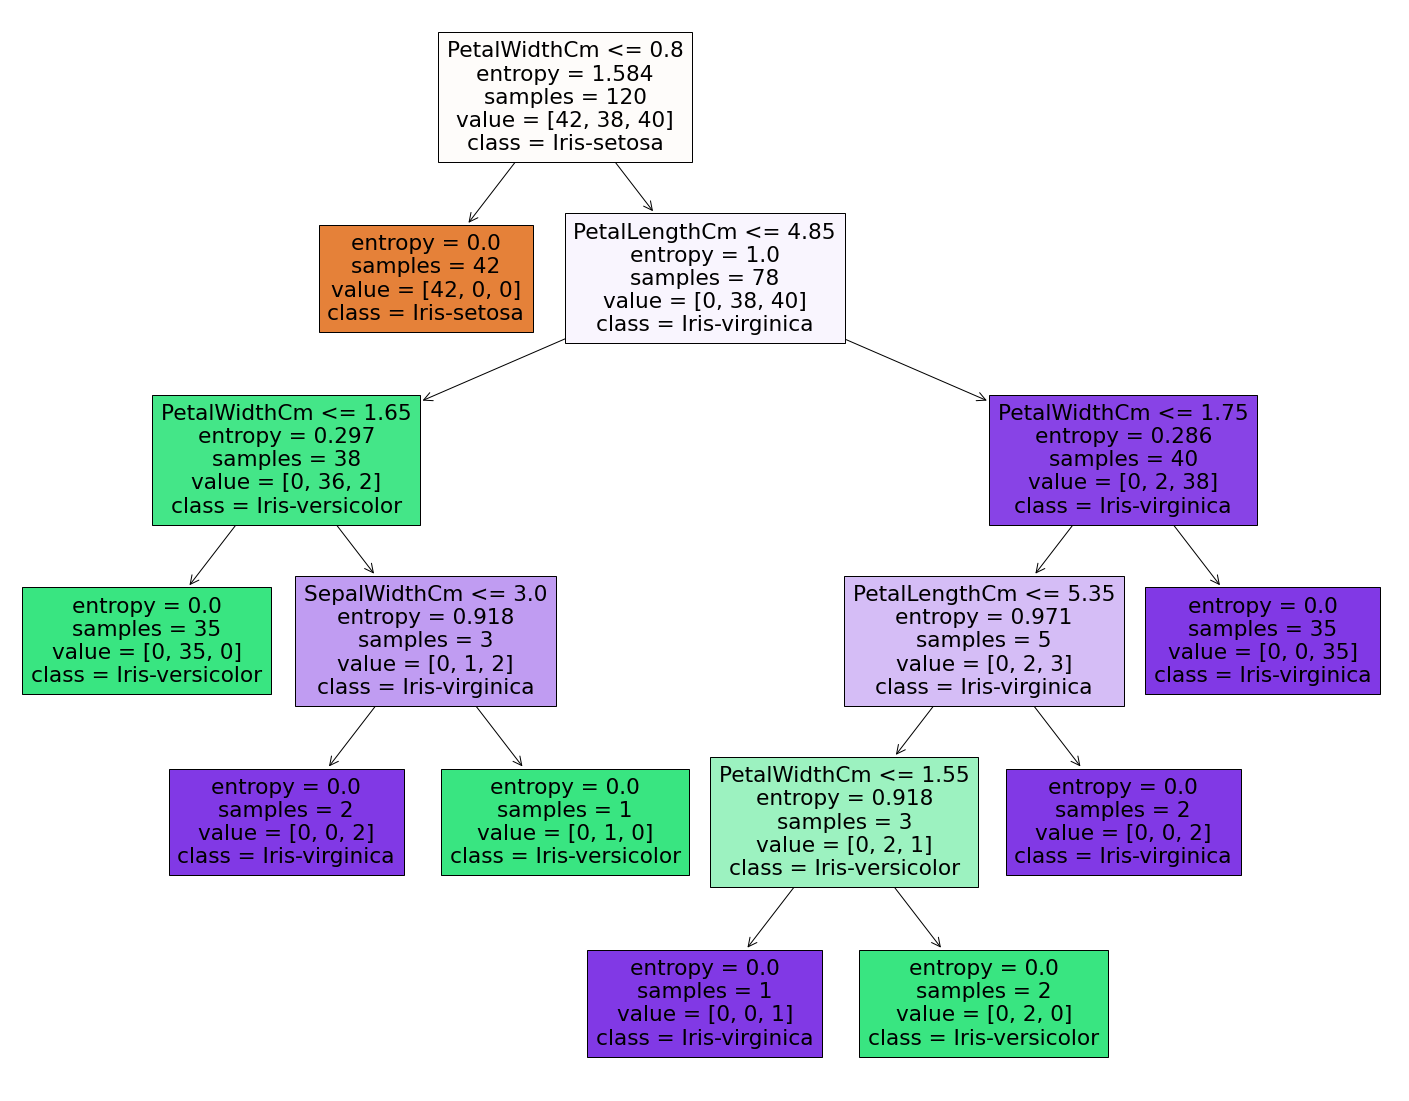

In [82]:
#plotting the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names= iris.columns[:-1],  
                   class_names= iris['Species'].unique(),
                   filled=True)